In [36]:
import numpy as np
import os
import matplotlib.pyplot as plt

num_params = 3 # matern kernel without nugget
cs_set = [10, 30, 60, 90, 120, 180, 210]
bc_set = [1000, 5000, 15000, 25000]
exact_mle_soil = [0.824936, 0.005625, 0.328957]
exact_mle_wind = [0.263825, 0.020392, 0.540432]

flag='wind/'
file_folder = os.path.join('./log', flag)
fig_folder = os.path.join('./fig', flag)
filename_template = 'locs_250000_cs_{}_bc_{}_seed_0_kernel_1.000000:0.100000:0.500000_random'

if not os.path.exists(fig_folder):
    os.mkdir(fig_folder)

def read_params():
    params_sum = np.zeros([num_params, len(cs_set), len(bc_set)])
    for i_cs, cs in enumerate(cs_set):
        for i_bs, bs in enumerate(bc_set):
            filename = filename_template.format(cs, bs)
            file_path = os.path.join(file_folder, filename)
            try:
                with open(file_path, 'r') as file:
                    # Use a loop to skip the first line
                    file.readline()  # Read and discard the first line
                    # Now, read the second line
                    second_line = file.readline()
                    for i_param in range(num_params):
                        params_sum[i_param, i_cs, i_bs] = float(second_line.split(", ")[i_param + 1])
            except FileNotFoundError:
                print(f"File {filename} not found")
    return params_sum

params_total = read_params()
# realign the spatial beta to its scale
# beta, spatial range
if flag[:4] == 'soil':
    print("soil")
    params_total[1, :, :] = params_total[1, :, :] * 9348.317 # soil
    exact_mle_soil[1] = exact_mle_soil[1] * 9348.317
else:
    print("wind")
    params_total[1, :, :] = params_total[1, :, :] * 2523.64 # wind
    exact_mle_wind[1] = exact_mle_wind[1] * 2523.64
print(params_total.shape)

wind
(3, 7, 4)


In [37]:
# import pandas as pd

# params_bash_form = []

# for i_bc, bbc in enumerate(bc_set):
#     for i_cs, ccs in enumerate(cs_set):
#         # print(i_bc, i_cs, params_total[:, i_cs, i_bc])
#         params_bash_form.append([int(bbc), int(ccs), params_total[0, i_cs, i_bc], params_total[1, i_cs, i_bc], params_total[2, i_cs, i_bc]])
# len(params_bash_form)
# df_params_bash_form = pd.DataFrame(params_bash_form)
# df_params_bash_form.to_csv(f'Params-{flag[:4]}.csv', index=False, header=False)

In [38]:
# _flag_sum = 0
# for i_bc, bbc in enumerate(bc_set):
#     for i_cs, ccs in enumerate(cs_set):
#         _params_form = params_bash_form[i_bc * len(cs_set) + i_cs]
#         # print(i_bc, i_cs, i_bc * len(cs_set) + i_cs, _params_form[2:], params_total[:, i_cs, i_bc])
#         if not (_params_form[2] == params_total[0, i_cs, i_bc] and _params_form[3] == params_total[1, i_cs, i_bc] and _params_form[4] == params_total[2, i_cs, i_bc]):
#             _flag_sum = _flag_sum + 1
# if _flag_sum !=0:
#     print("error!", _flag_sum)
# else:
#     print("success!")

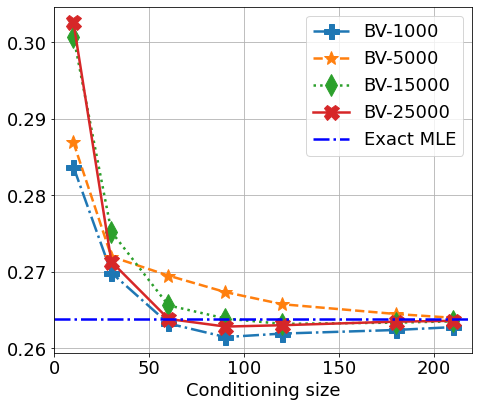

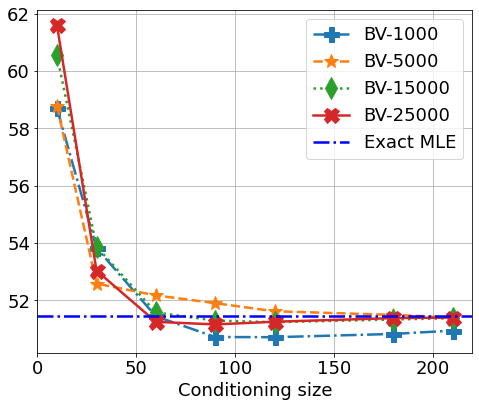

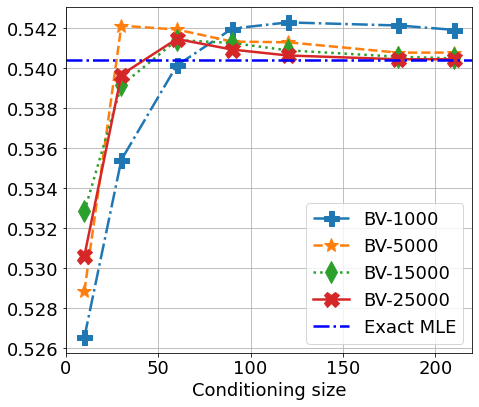

In [39]:
params_name = [r"$\hat \sigma^2$", r"$\hat \beta$", r"$\hat \nu$"]
plt.rcParams['font.size'] = 18  # You can set any numeric value here

markers = ['P', '*', 'd', 'X', '8']
colors = [
    "#3357FF",  # Royal blue
    "#33FFF6",  # Cyan
    "#8B4513",  # Saddle brown
    "#FF33F6",  # Magenta
    "#F6FF33",  # Yellow
    "#FF5733",  # Reddish-orange
    "#33FF57",  # Bright green
    "#FF69B4",   # Hot pink
]
linestyles = ['-.', '--', ':','-']


def plot_params(data_ori, i_params):
    # Plotting
    data = data_ori
        
    plt.figure(figsize=(7, 6))
    
    for i_bs, bsBV in enumerate(bc_set):
            
        plt.plot(cs_set, data[i_params, :, i_bs], # color=colors[i_bs],
                marker=markers[i_bs], 
                linestyle=linestyles[i_bs], 
                markersize=15,
                linewidth=2.5,
                label=f'BV-{bsBV}')
    if flag[:4] == 'soil':
        plt.axhline(y= exact_mle_soil[i_params], 
                    label="Exact MLE",
                    linestyle='-.',
                    linewidth=2.5, color="blue")
    else:
        plt.axhline(y= exact_mle_wind[i_params], label="Exact MLE", 
                    linestyle='-.',
                    linewidth=2.5, color="blue")
    # plt.title('Line Plot of Parameters')

    plt.xlabel('Conditioning size')
    # plt.title(params_name[i_params])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(fig_folder + f'params_{i_params}.pdf')
    plt.show()
    
for i in range(len(params_name)):
    plot_params(params_total, i)

## Soil Prediction

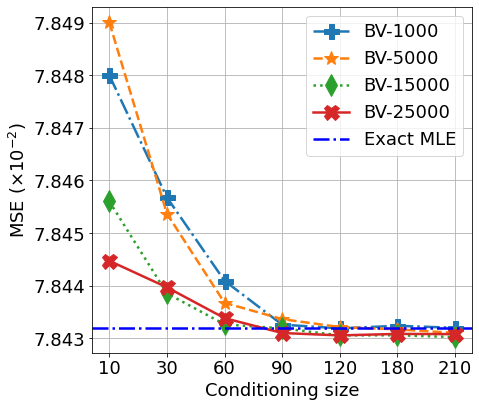

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Data provided by the user
data = """
10      30      60      90      120     180     210
1000    7.847996E-02    7.845675E-02    7.844091E-02    7.843258E-02    7.843188E-02    7.843236E-02    7.843198E-02
5000    7.849002E-02    7.845365E-02    7.843673E-02    7.843363E-02    7.843212E-02    7.843168E-02    7.843101E-02
15000   7.845599E-02    7.843853E-02    7.843263E-02    7.843188E-02    7.843054E-02    7.843056E-02    7.843022E-02
25000   7.844471E-02    7.843967E-02    7.843382E-02    7.843099E-02    7.843054E-02    7.843082E-02    7.843078E-02
"""

# Converting the string data into a pandas DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Transpose the DataFrame to get each row as a line in the plot
df_t = df.T

# Creating the plot
plt.figure(figsize=(7, 6))

# Plotting each line
for icol, column in enumerate(df_t.columns):
    plt.plot(df_t.index, df_t[column] * 1e2, 
             marker=markers[icol], 
                linestyle=linestyles[icol], 
                markersize=15,
                linewidth=2.5,
                label=f'BV-{column}')
plt.axhline(y= 7.843191, label="Exact MLE", 
            linestyle='-.',
            linewidth=2.5, color="blue")
# Adding labels and title
plt.xlabel('Conditioning size')
plt.ylabel(r'MSE ($\times 10^{-2}$)')
# plt.title('Line Plot of the Given Data')
# Set y-axis label format
# plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3e'))

# Adding legend
plt.legend()

plt.tight_layout()
# Show grid
plt.grid(True)

plt.savefig(fig_folder + f'soil-mse.pdf')
# Display the plot
plt.show()


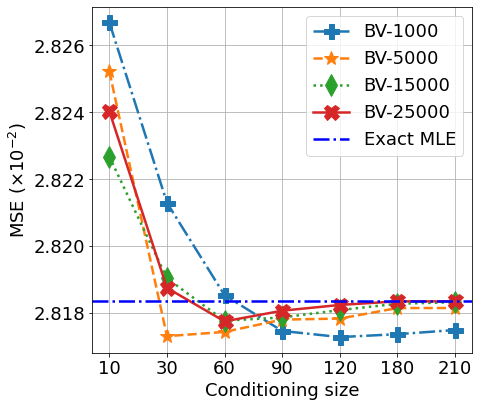

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Data provided by the user
data_wind = """
10      30      60      90      120     180     210
1000    2.826687e-02    2.821292e-02    2.818523e-02    2.817454e-02    2.817271e-02    2.817357e-02    2.817482e-02
5000    2.825221e-02    2.817298e-02    2.817425e-02    2.817793e-02    2.817825e-02    2.818139e-02    2.818140e-02
15000   2.822670e-02    2.819030e-02    2.817761e-02    2.817858e-02    2.818079e-02    2.818268e-02    2.818314e-02
25000   2.824031e-02    2.818742e-02    2.817741e-02    2.818060e-02    2.818232e-02    2.818340e-02    2.818340e-02
"""

# Converting the string data into a pandas DataFrame
df_wind = pd.read_csv(StringIO(data_wind), delim_whitespace=True)

# Transpose the DataFrame to get each row as a line in the plot
df_t_wind = df_wind.T

# Creating the plot
plt.figure(figsize=(7, 6))

# Plotting each line
for icol, column in enumerate(df_t_wind.columns):
    plt.plot(df_t_wind.index, df_t_wind[column] * 1e2, 
             marker=markers[icol], 
                linestyle=linestyles[icol], 
                markersize=15,
                linewidth=2.5,
                label=f'BV-{column}')
plt.axhline(y= 2.818353, label="Exact MLE", 
            linestyle='-.',
            linewidth=2.5, color="blue")
# Adding labels and title
plt.xlabel('Conditioning size')
plt.ylabel(r'MSE ($\times 10^{-2}$)')
# plt.title('Line Plot of the Given Data')
# Set y-axis label format
# plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3e'))

# Adding legend
plt.legend()

plt.tight_layout()
# Show grid
plt.grid(True)

plt.savefig(f'./fig/wind/wind-mse.pdf')
# Display the plot
plt.show()
